In [1]:
import pydicom as dicom
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid") 

import tensorflow as tf
tf.get_logger().setLevel('INFO')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-12-13 22:08:07.467030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os 
from os import walk

In [3]:
# get all CN image files in subdirectories
cn_path = '/Users/adelinechin/207/114 CN Axial'

# list to store files name
cn_list = []
for (cn_path, dir_names, file_names) in walk(cn_path):
    for file in file_names:
        if file.endswith('.dcm'):
            cn_list.append(os.path.join(cn_path, file))
print(cn_list)

['/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axial_PD-T2_TSE__br_raw_20060531165115228_29_S15078_I16273.dcm', '/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axial_PD-T2_TSE__br_raw_20060531165128181_45_S15078_I16273.dcm', '/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axial_PD-T2_TSE__br_raw_20060531165109478_22_S15078_I16273.dcm', '/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axial_PD-T2_TSE__br_raw_20060531165058602_8_S15078_I16273.dcm', '/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axial_PD-T2_TSE__br_raw_20060531165054821_3_S15078_I16273.dcm', '/Users/adelinechin/207/114 CN Axial/073_S_0312/Axial_PD-T2_TSE/2006-05-31_13_34_40.0/I16273/ADNI_073_S_0312_MR_Axia

In [4]:
# choose scans from the middle of the brain
image_id = ['22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
cn_images = []
for file_name in cn_list:
    if file_name[len(file_name)-20:len(file_name)-18] in image_id:
        cn_images.append(file_name)

In [5]:
# get all AD image files in subdirectories
ad_path = '/Users/adelinechin/207/120 AD Axial'

# list to store files name
ad_list = []
for (ad_path, dir_names, file_names) in walk(ad_path):
    for file in file_names:
        if file.endswith('.dcm'):
            ad_list.append(os.path.join(ad_path, file))
print(ad_list)

['/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_Axial_PD-T2_TSE__br_raw_20060718144733236_84_S16922_I19127.dcm', '/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_Axial_PD-T2_TSE__br_raw_20060718144701049_102_S16922_I19127.dcm', '/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_Axial_PD-T2_TSE__br_raw_20060718144703331_110_S16922_I19127.dcm', '/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_Axial_PD-T2_TSE__br_raw_20060718144731033_76_S16922_I19127.dcm', '/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_Axial_PD-T2_TSE__br_raw_20060718144659284_96_S16922_I19127.dcm', '/Users/adelinechin/207/120 AD Axial/062_S_0690/Axial_PD-T2_TSE/2006-07-18_10_33_08.0/I19127/ADNI_062_S_0690_MR_

In [6]:
# choose scans from the middle of the brain

ad_images = []
for file_name in ad_list:
    if file_name[len(file_name)-20:len(file_name)-18] in image_id:
        ad_images.append(file_name)

In [7]:
# generate labels
cn_labels = [0]*len(cn_images)
ad_labels = [1]*len(ad_images)

In [8]:
# sanity check label lists
len(cn_labels) == len(cn_images) and len(ad_labels) == len(ad_images)

True

In [9]:
# combine CN and AD data
labels = []
for label in cn_labels:
    labels.append(label)
for label in ad_labels:
    labels.append(label)

scans = []
for scan in cn_images:
    scans.append(scan)
for scan in ad_images:
    scans.append(scan)

In [10]:
# sanity check data
len(labels) == len(scans)

True

In [11]:
# read and convert image paths to pixel arrays
images = []
for path in scans:
    ds = dicom.dcmread(path, force=True)
    try:
        # Dicom to pixel array
        pixel_array = ds.pixel_array.astype(float)
        
    except AttributeError:
        continue
    images.append(pixel_array)

In [12]:
# sanity check
len(images) == len(scans)

True

In [13]:
# list to ndarray
labels = np.array(labels)

for i, image in enumerate(images):
    images[i] = np.resize(image, (224, 224))
    images[i] = np.dstack([images[i], images[i], images[i]])

In [14]:
images = np.stack(images)

In [15]:
images.shape

(1576, 224, 224, 3)

In [16]:
labels.shape

(1576,)

### Split into train/validation/test data and apply transformations and augmentations

In [17]:
IMAGE_SIZE = (224, 224)
CONTRAST_FACTOR = 1
DELTA = 0.3

def preprocess(images, y, split=(0.6,0.2,0.2)):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images.shape[0]))
    images, y = images[shuffle], y[shuffle]

    splits = np.multiply(len(images), split).astype(int)
    X_train, X_val, X_test = np.split(images, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y, [splits[0], splits[0]+splits[1]])

    # image transformation on training, validation, and test data
    X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
    X_val = tf.image.resize(X_val, size=IMAGE_SIZE)
    X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

    X_train = X_train/255.0
    X_val = X_val/255.0
    X_test = X_test/255.0

    # image augmentation on training data
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)

    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)

    # concatenate y_train
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)

    # shuffle X_train and y_train
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() 

    return X_train, y_train, X_val, y_val, X_test, y_test

In [18]:
X_train, y_train, X_val, y_val, X_test, y_test = preprocess(images, labels, split=(0.6,0.2,0.2))

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (1890, 224, 224, 3)
y_train shape (1890,)
X_val shape (315, 224, 224, 3)
y_val shape (315,)
X_test shape (316, 224, 224, 3)
y_test shape (316,)


### Build model

In [19]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    name='conv_2',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=1024,
    name='fc_1',
    activation='relu'))

model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(
    units=1,
    name='fc_2',
    activation=None))

tf.random.set_seed(1)
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 112, 112, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv_2 (Conv2D)             (None, 112, 112, 64)      18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 56, 56, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                        

### Compile model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

### Fit model

In [85]:
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val)
)

Epoch 1/10
60/60 [==============================] - 302s 5s/step - loss: 30.7631 - accuracy: 0.5492 - val_loss: 1.8667 - val_accuracy: 0.6095
Epoch 2/10
60/60 [==============================] - 275s 5s/step - loss: 2.9467 - accuracy: 0.6677 - val_loss: 4.4748 - val_accuracy: 0.5016
Epoch 3/10
60/60 [==============================] - 177s 3s/step - loss: 0.6428 - accuracy: 0.7339 - val_loss: 9.2484 - val_accuracy: 0.4762
Epoch 4/10
60/60 [==============================] - 121s 2s/step - loss: 0.7440 - accuracy: 0.7439 - val_loss: 7.8819 - val_accuracy: 0.4857
Epoch 5/10
60/60 [==============================] - 136s 2s/step - loss: 0.5775 - accuracy: 0.7704 - val_loss: 4.2702 - val_accuracy: 0.5048
Epoch 6/10
60/60 [==============================] - 166s 3s/step - loss: 0.5415 - accuracy: 0.8026 - val_loss: 2.0920 - val_accuracy: 0.6190
Epoch 7/10
60/60 [==============================] - 157s 3s/step - loss: 0.3702 - accuracy: 0.8450 - val_loss: 1.4281 - val_accuracy: 0.7524
Epoch 8/10
6

### Evaluation

In [86]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

10/10 [==============================] - 18s 1s/step - loss: 0.9615 - accuracy: 0.8703

Test Acc. 87.03%


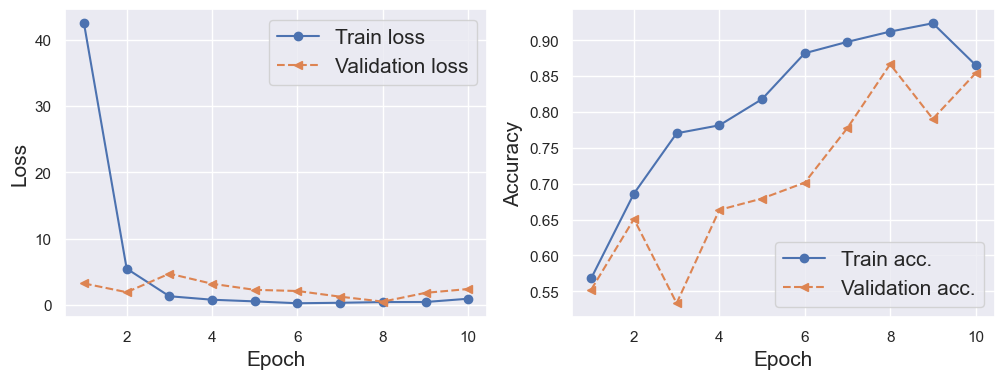

In [50]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [21]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

10/10 [==============================] - 6s 563ms/step


In [22]:
for i, pred in enumerate(y_pred):
    if pred >=0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [65]:
f1_score(y_test, y_pred, average='binary')

0.8620689655172413

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.85      0.88      0.86       171

    accuracy                           0.85       316
   macro avg       0.85      0.85      0.85       316
weighted avg       0.85      0.85      0.85       316



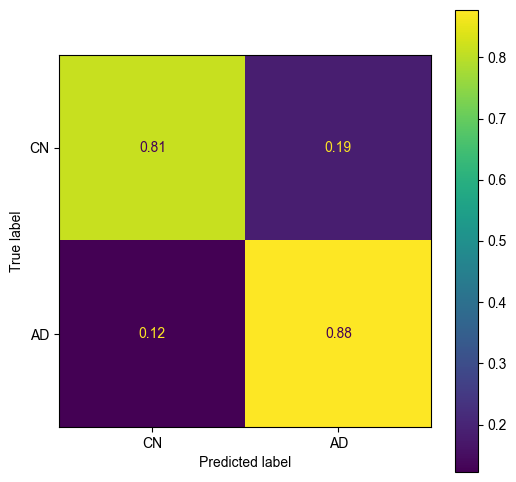

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display_labels = ['CN', 'AD']

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred, normalize='true'), 
    display_labels=display_labels)

with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=[6,6])
    disp.plot(include_values=True, xticks_rotation='horizontal', ax=ax);